In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
os.chdir('/content/drive/MyDrive/Summer22_ML Assignments')

#Importing Dataset
dataset_SeoulBikedata = pd.read_csv('SeoulBikeData.csv', encoding = 'latin-1')
dataset_SeoulBikedata.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

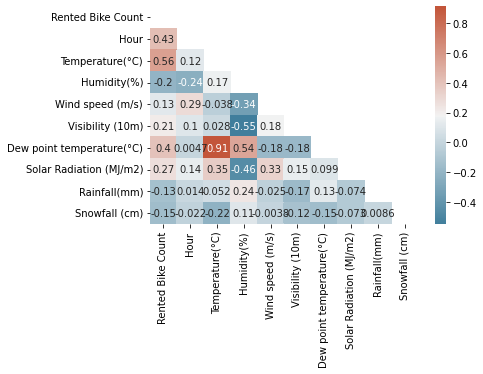

In [ ]:
dataset_SeoulBikedata['Date'] = pd.to_datetime(dataset_SeoulBikedata['Date'], format="%d/%m/%Y")

dataset_SeoulBikedata = dataset_SeoulBikedata[dataset_SeoulBikedata['Functioning Day'] == 'Yes']
dataset_SeoulBikedata.reset_index(inplace = True)
dataset_SeoulBikedata.drop(columns = ['index','Functioning Day'],inplace = True)

dataset_SeoulBikedata['Day_or_night'] = (dataset_SeoulBikedata['Hour']).apply(lambda x: 'Night' if (x>19 or x<5)else ('Day'))
dataset_SeoulBikedata['Weekday'] = pd.DatetimeIndex(dataset_SeoulBikedata['Date']).day_name()

corrMatrix = dataset_SeoulBikedata.corr()
sn.heatmap(corrMatrix, annot=True, cmap = sn.diverging_palette(230, 20, as_cmap=True), mask = np.triu(np.ones_like(corrMatrix)))
sn.set(rc={'figure.figsize':(10,7.5)})

In [ ]:
dataset_SeoulBikedata = dataset_SeoulBikedata.drop(columns = ['Dew point temperature(°C)'])

In [ ]:
median_rented_bike_count = dataset_SeoulBikedata['Rented Bike Count'].median()
median_rented_bike_count

print('Number of rows with Rented bike count less than median value: ', 
      dataset_SeoulBikedata['Rented Bike Count'][dataset_SeoulBikedata['Rented Bike Count'] < median_rented_bike_count].count())
print('Number of rows with Rented bike count greater than median value: ', 
      dataset_SeoulBikedata['Rented Bike Count'][dataset_SeoulBikedata['Rented Bike Count'] > median_rented_bike_count].count())

Number of rows with Rented bike count less than median value:  4229
Number of rows with Rented bike count greater than median value:  4231


In [ ]:
#Converting Target variable into binary based on median value
dataset_SeoulBikedata.loc[dataset_SeoulBikedata['Rented Bike Count'] < median_rented_bike_count, 'Rented Bike Count_binary'] = 0
dataset_SeoulBikedata.loc[dataset_SeoulBikedata['Rented Bike Count'] > median_rented_bike_count, 'Rented Bike Count_binary'] = 1

In [ ]:
dataset_SeoulBikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day_or_night,Weekday,Rented Bike Count_binary
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0


In [ ]:
#Encoding Categorical Variables

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown = "ignore")
df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(dataset_SeoulBikedata[['Seasons','Holiday']]).toarray())
dataset_SeoulBikedata_encoded = dataset_SeoulBikedata.join(df_encoded)

In [ ]:
dataset_SeoulBikedata_encoded = dataset_SeoulBikedata_encoded.drop(columns = ['Seasons','Holiday'])
#dataset_SeoulBikedata_encoded = dataset_SeoulBikedata_encoded.apply(pd.to_numeric)
dataset_SeoulBikedata_encoded = dataset_SeoulBikedata_encoded.drop(columns = ['Date', 'Weekday', 'Day_or_night'])

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(dataset_SeoulBikedata_encoded)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count_binary,0,1,2,3,4,5
0,254.0,0.0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,204.0,1.0,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,173.0,2.0,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,107.0,3.0,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,78.0,4.0,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,1003.0,19.0,4.2,34.0,2.6,1894.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8461,764.0,20.0,3.4,37.0,2.3,2000.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8462,694.0,21.0,2.6,39.0,0.3,1968.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8463,712.0,22.0,2.1,41.0,1.0,1859.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataset_SeoulBikedata_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8460 entries, 0 to 8464
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8460 non-null   int64  
 1   Hour                      8460 non-null   int64  
 2   Temperature(°C)           8460 non-null   float64
 3   Humidity(%)               8460 non-null   int64  
 4   Wind speed (m/s)          8460 non-null   float64
 5   Visibility (10m)          8460 non-null   int64  
 6   Solar Radiation (MJ/m2)   8460 non-null   float64
 7   Rainfall(mm)              8460 non-null   float64
 8   Snowfall (cm)             8460 non-null   float64
 9   Rented Bike Count_binary  8460 non-null   float64
 10  0                         8460 non-null   float64
 11  1                         8460 non-null   float64
 12  2                         8460 non-null   float64
 13  3                         8460 non-null   float64
 14  4       

In [ ]:
columns = list(dataset_SeoulBikedata_encoded.drop(columns = ['Rented Bike Count', 'Rented Bike Count_binary']).columns)

In [ ]:
x = dataset_SeoulBikedata_encoded.drop(columns = ['Rented Bike Count', 'Rented Bike Count_binary'])
y = dataset_SeoulBikedata_encoded['Rented Bike Count_binary']

#Splitting Dataset into Training & Test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1123401)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

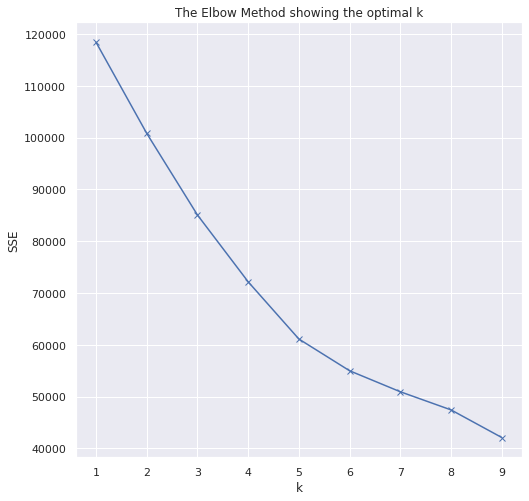

In [ ]:
#Implementing Elbow method
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
range_k = range(1,10)
for k in range_k:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    #distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range_k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
#Kmeans Clustering

kmeans_allfeatures = KMeans(n_clusters = 5, random_state = 1234)
y_kmeans_allfeatures = kmeans_allfeatures.fit_predict(x)

In [ ]:
import random
def random_colours(number_of_colours):
  colours = []
  for i in range(number_of_colours):
    colours.append('#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
  return colours
colors = random_colours(10) 

In [ ]:
from sklearn.mixture import GaussianMixture
em_allfeatures = GaussianMixture(n_components = 5,random_state = 1234, n_init = 10)
y_em_allfeatures = em_allfeatures.fit_predict(x)

Silhouetter Score: 0.326


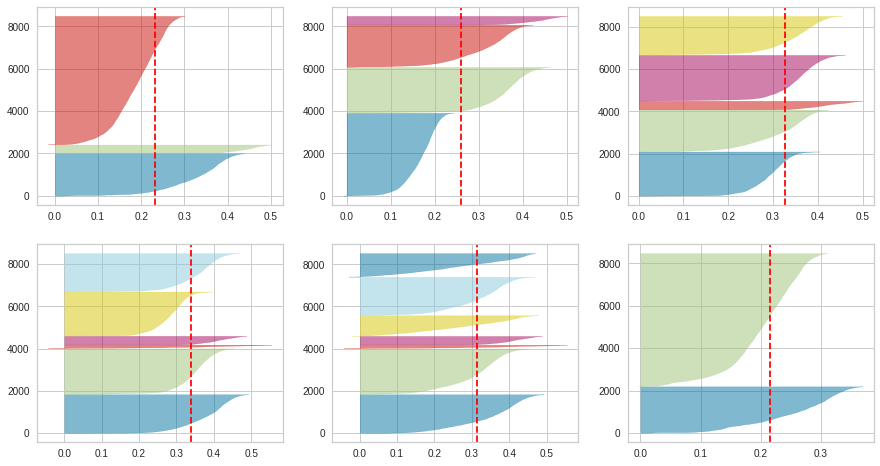

In [ ]:
#Silhouette score
from sklearn.metrics import silhouette_score
s_score_km = silhouette_score(x, kmeans_allfeatures.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % s_score_km)

from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=1234)
    q, mod = divmod(i, 3)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

In [ ]:
from collections import Counter
Counter(kmeans_allfeatures.labels_)

Counter({0: 2087, 1: 1972, 2: 407, 3: 2159, 4: 1835})

In [ ]:
#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1123401)
classifier_dt.fit(x_train, y_train)


forward_selection = sfs(classifier_dt, k_features = 9, forward = True, floating = False, verbose = 2, scoring = 'accuracy', cv = 5)
forward_selection = forward_selection.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2022-08-08 03:14:34] Features: 1/9 -- score: 0.7472102007070361[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.6s finished

[2022-08-08 03:14:35] Features: 2/9 -- score: 0.8149234519329456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.7s finished

[2022-08-08 03:14:36] Features: 3/9 -- score: 0.8743629547268787[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
feat_cols = list(forward_selection.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 5, 6, 7, 8, 9, 11]


In [ ]:
from sklearn.metrics import accuracy_score
classifier_dt_selectedfeatures = classifier_dt.fit(x_train[:, feat_cols], y_train)

y_test_pred = classifier_dt_selectedfeatures.predict(x_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

classifier_dt_allfeatures = classifier_dt.fit(x_train, y_train)

y_test_pred = classifier_dt_allfeatures.predict(x_test)
print('Testing accuracy on all features: %.3f' % accuracy_score(y_test, y_test_pred))

Testing accuracy on selected features: 0.903
Testing accuracy on all features: 0.909


In [ ]:
from sklearn.decomposition import PCA

pca_allfeatures = PCA(random_state = 1234)
pca_allfeatures.fit_transform(x)

pca_selectedfeatures = PCA(n_components = 9)
pca_selectedfeatures.fit_transform(x)
pca_selectedfeatures_df = pd.DataFrame(data = pca_selectedfeatures.fit_transform(x))

pca_selectedfeatures_2 = PCA(n_components = 2)
pca_selectedfeatures_2.fit_transform(x)
pca_selectedfeatures_2_df = pd.DataFrame(data = pca_selectedfeatures_2.fit_transform(x))


pca_selectedfeatures_3 = PCA(n_components = 3)
pca_selectedfeatures_3.fit_transform(x)
pca_selectedfeatures_3_df = pd.DataFrame(data = pca_selectedfeatures_3.fit_transform(x))
print(pca_selectedfeatures_df.shape, pca_selectedfeatures_2_df.shape,pca_selectedfeatures_3_df.shape)


(8460, 9) (8460, 2) (8460, 3)


In [ ]:
selected_features = []
for i in feat_cols:
  selected_features.append(columns[i])
feature_variance_df = pd.DataFrame({'selected_features':selected_features, 'variance':pca_selectedfeatures.explained_variance_ratio_})
feature_variance_df

,selected_features,variance
0,Hour,0.179790
1,Temperature(°C),0.160788
2,Humidity(%),0.136899
3,Solar Radiation (MJ/m2),0.104963
4,Rainfall(mm),0.096520
5,Snowfall (cm),0.078366
6,0,0.066406
7,1,0.058690
8,3,0.048622


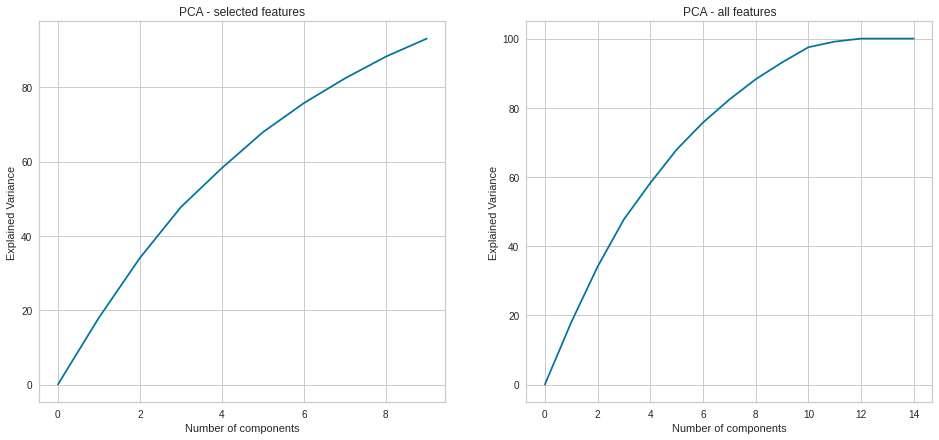

In [ ]:
selected_features_variance = list(np.cumsum(pca_selectedfeatures.explained_variance_ratio_*100))
selected_features_variance[:0] = [0]
all_features_variance = list(np.cumsum(pca_allfeatures.explained_variance_ratio_*100))
all_features_variance[:0] = [0]

fig = plt.figure(figsize = (16, 7))
plt.subplot(1, 2, 1)

plt.plot(selected_features_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('PCA - selected features')

plt.subplot(1, 2, 2)
plt.plot(all_features_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('PCA - all features')
plt.show()

In [ ]:
from sklearn.decomposition import FastICA
ica_2 = FastICA(n_components = 2, random_state = 1234)
ica_selectedfeatures_2 = ica_2.fit_transform(x)
ica_selectedfeatures_2_df = pd.DataFrame(data = ica_selectedfeatures_2)

ica_3 = FastICA(n_components = 3, random_state = 1234)
ica_selectedfeatures_3 = ica_3.fit_transform(x)
ica_selectedfeatures_3_df = pd.DataFrame(data = ica_selectedfeatures_3)
print(ica_selectedfeatures_2_df.shape, ica_selectedfeatures_3_df.shape)

(8460, 2) (8460, 3)


In [ ]:
from sklearn import random_projection
rp_2 = random_projection.GaussianRandomProjection(n_components = 2, eps = 0.1, random_state = 1234)
rp_selectedfeatures_2 = rp_2.fit_transform(x)
rp_selectedfeatures_2_df = pd.DataFrame(data = rp_selectedfeatures_2)

rp_3 = random_projection.GaussianRandomProjection(n_components = 3, eps = 0.1, random_state = 1234)
rp_selectedfeatures_3 = rp_3.fit_transform(x)
rp_selectedfeatures_3_df = pd.DataFrame(data = rp_selectedfeatures_3)
print(rp_selectedfeatures_2_df.shape, rp_selectedfeatures_3_df.shape)

(8460, 2) (8460, 3)


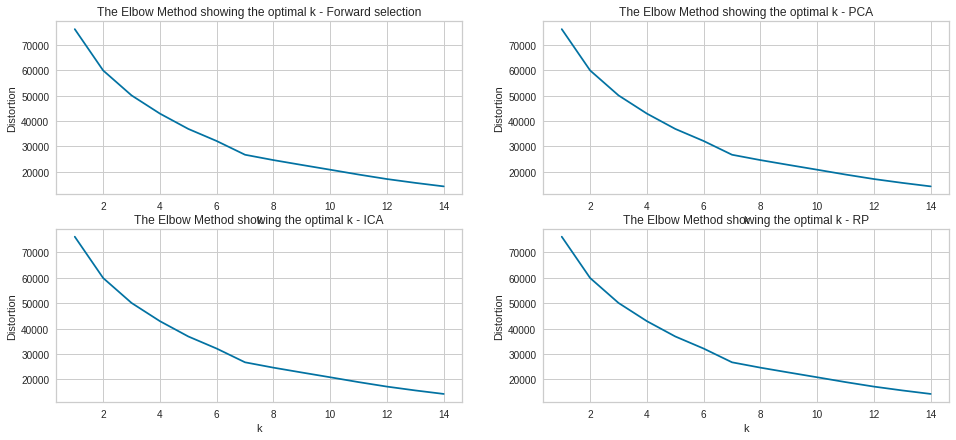

In [ ]:
#Implementing Elbow method
from sklearn.cluster import KMeans
distortions_forward_selection = []
distortions_pca = []
distortions_ica = []
distortions_rp = []
range_k = range(1,15)
for k in range_k:
    kmeanModel_forward_selection = KMeans(n_clusters=k)
    kmeanModel_forward_selection.fit(x[:, feat_cols])
    distortions_forward_selection.append(kmeanModel_forward_selection.inertia_)
    kmeanModel_pca = KMeans(n_clusters=k)
    kmeanModel_pca.fit(x[:, feat_cols])
    distortions_pca.append(kmeanModel_pca.inertia_)
    kmeanModel_ica = KMeans(n_clusters=k)
    kmeanModel_ica.fit(x[:, feat_cols])
    distortions_ica.append(kmeanModel_ica.inertia_)
    kmeanModel_rp = KMeans(n_clusters=k)
    kmeanModel_rp.fit(x[:, feat_cols])
    distortions_rp.append(kmeanModel_rp.inertia_)

fig = plt.figure(figsize = (16, 7))
plt.subplot(2, 2, 1)
plt.plot(range_k, distortions_forward_selection, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k - Forward selection')

plt.subplot(2, 2, 2)
plt.plot(range_k, distortions_forward_selection, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k - PCA')

plt.subplot(2, 2, 3)
plt.plot(range_k, distortions_forward_selection, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k - ICA')

plt.subplot(2, 2, 4)
plt.plot(range_k, distortions_forward_selection, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k - RP')
plt.show()

In [ ]:
#Kmeans Clustering

kmeans_forward_selection_2 = KMeans(n_clusters = 5, random_state = 1234)
y_kmeans_forward_selection_2 = kmeans_forward_selection_2.fit_predict(x[:, feat_cols[:2]])

kmeans_pca_2 = KMeans(n_clusters = 5, random_state = 1234)
y_kmeans_pca_2 = kmeans_pca_2.fit_predict(pca_selectedfeatures_2_df)

kmeans_ica_2 = KMeans(n_clusters =5, random_state = 1234)
y_kmeans_ica_2 = kmeans_ica_2.fit_predict(ica_selectedfeatures_2_df)

kmeans_rp_2 = KMeans(n_clusters = 5, random_state = 1234)
y_kmeans_rp_2 = kmeans_rp_2.fit_predict(rp_selectedfeatures_2_df)

kmeans_forward_selection_3 = KMeans(n_clusters = 5, random_state = 1234)
y_kmeans_forward_selection_3 = kmeans_forward_selection_3.fit_predict(x[:, feat_cols[:3]])

kmeans_pca_3 = KMeans(n_clusters = 5, random_state = 1234)
y_kmeans_pca_3 = kmeans_pca_3.fit_predict(pca_selectedfeatures_3_df)

kmeans_ica_3 = KMeans(n_clusters = 5, random_state = 1234)
y_kmeans_ica_3 = kmeans_ica_3.fit_predict(ica_selectedfeatures_3_df)

kmeans_rp_3 = KMeans(n_clusters = 5, random_state = 1234)
y_kmeans_rp_3 = kmeans_rp_3.fit_predict(rp_selectedfeatures_3_df)


In [ ]:
s_score_km_pca_2 = silhouette_score(x, kmeans_pca_2.labels_, metric='euclidean')
s_score_km_ica_2 = silhouette_score(x, kmeans_ica_2.labels_, metric='euclidean')
s_score_km_rp_2 = silhouette_score(x, kmeans_rp_2.labels_, metric='euclidean')
s_score_km_pca_3 = silhouette_score(x, kmeans_pca_3.labels_, metric='euclidean')
s_score_km_ica_3 = silhouette_score(x, kmeans_ica_3.labels_, metric='euclidean')
s_score_km_rp_3 = silhouette_score(x, kmeans_rp_3.labels_, metric='euclidean')

print(s_score_km_pca_2, s_score_km_ica_2, s_score_km_rp_2, s_score_km_pca_3, s_score_km_ica_3, s_score_km_rp_3)

0.11959157726214277 0.11579246300390121 0.1415072058311415 0.17573041715810309 0.17717960199253094 0.18144245101005918


In [ ]:
pca_selectedfeatures_2_df = pca_selectedfeatures_2_df.values
ica_selectedfeatures_2_df = ica_selectedfeatures_2_df.values
rp_selectedfeatures_2_df = rp_selectedfeatures_2_df.values

pca_selectedfeatures_3_df = pca_selectedfeatures_3_df.values
ica_selectedfeatures_3_df = ica_selectedfeatures_3_df.values
rp_selectedfeatures_3_df = rp_selectedfeatures_3_df.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

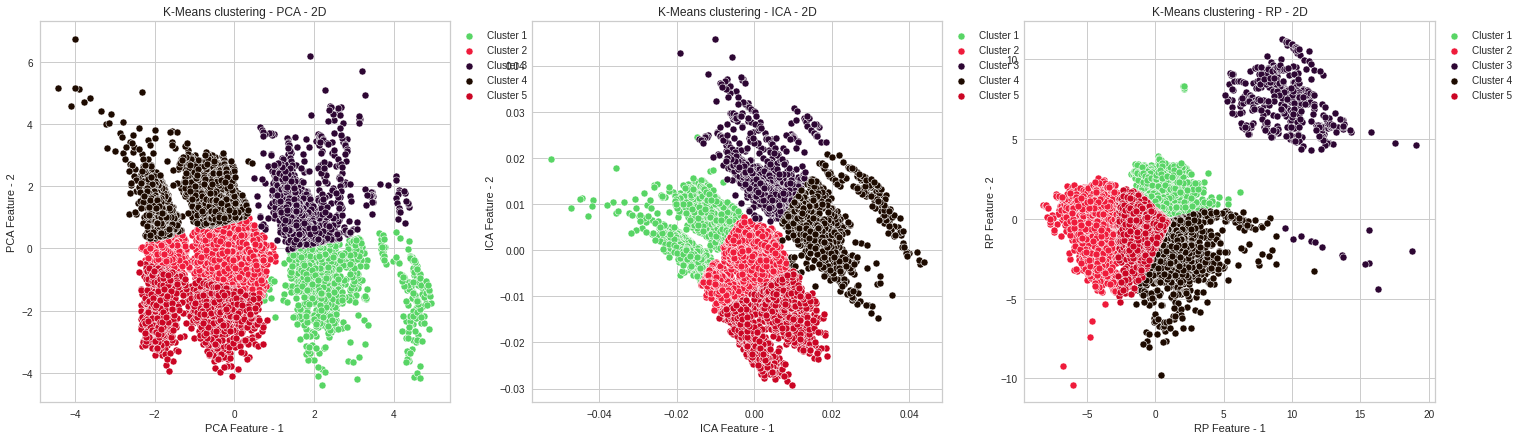

In [ ]:
# size of image
fig = plt.figure(figsize = (25, 7))
plt.subplot(1, 3, 1)

# visualizing the clusters
sn.scatterplot(pca_selectedfeatures_2_df[y_kmeans_pca_2 == 0, 0], pca_selectedfeatures_2_df[y_kmeans_pca_2 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(pca_selectedfeatures_2_df[y_kmeans_pca_2 == 1, 0], pca_selectedfeatures_2_df[y_kmeans_pca_2 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(pca_selectedfeatures_2_df[y_kmeans_pca_2 == 2, 0], pca_selectedfeatures_2_df[y_kmeans_pca_2 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(pca_selectedfeatures_2_df[y_kmeans_pca_2 == 3, 0], pca_selectedfeatures_2_df[y_kmeans_pca_2 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(pca_selectedfeatures_2_df[y_kmeans_pca_2 == 4, 0], pca_selectedfeatures_2_df[y_kmeans_pca_2 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
plt.xlabel('PCA Feature - 1')
plt.ylabel('PCA Feature - 2')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('K-Means clustering - PCA - 2D')

plt.subplot(1, 3, 2)

# visualizing the clusters
sn.scatterplot(ica_selectedfeatures_2_df[y_kmeans_ica_2 == 0, 0], ica_selectedfeatures_2_df[y_kmeans_ica_2 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(ica_selectedfeatures_2_df[y_kmeans_ica_2 == 1, 0], ica_selectedfeatures_2_df[y_kmeans_ica_2 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(ica_selectedfeatures_2_df[y_kmeans_ica_2 == 2, 0], ica_selectedfeatures_2_df[y_kmeans_ica_2 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(ica_selectedfeatures_2_df[y_kmeans_ica_2 == 3, 0], ica_selectedfeatures_2_df[y_kmeans_ica_2 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(ica_selectedfeatures_2_df[y_kmeans_ica_2 == 4, 0], ica_selectedfeatures_2_df[y_kmeans_ica_2 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
plt.xlabel('ICA Feature - 1')
plt.ylabel('ICA Feature - 2')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('K-Means clustering - ICA - 2D')


plt.subplot(1, 3, 3)

# visualizing the clusters
sn.scatterplot(rp_selectedfeatures_2_df[y_kmeans_rp_2 == 0, 0], rp_selectedfeatures_2_df[y_kmeans_rp_2 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(rp_selectedfeatures_2_df[y_kmeans_rp_2 == 1, 0], rp_selectedfeatures_2_df[y_kmeans_rp_2 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(rp_selectedfeatures_2_df[y_kmeans_rp_2 == 2, 0], rp_selectedfeatures_2_df[y_kmeans_rp_2 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(rp_selectedfeatures_2_df[y_kmeans_rp_2 == 3, 0], rp_selectedfeatures_2_df[y_kmeans_rp_2 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(rp_selectedfeatures_2_df[y_kmeans_rp_2 == 4, 0], rp_selectedfeatures_2_df[y_kmeans_rp_2 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
plt.xlabel('RP Feature - 1')
plt.ylabel('RP Feature - 2')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('K-Means clustering - RP - 2D')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':
/usr/local/lib/pyt

Text(0.5, 0.92, 'K-Means clustering - PCA - 3D')

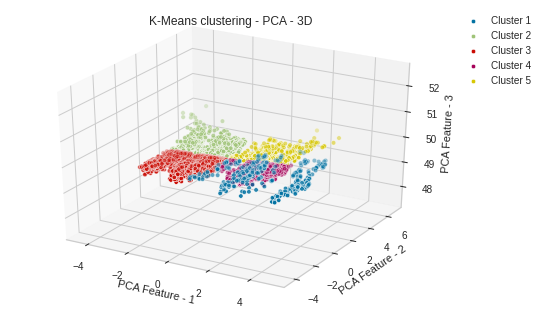

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing the clusters
axes = plt.axes(projection='3d')
sn.scatterplot(pca_selectedfeatures_3_df[y_kmeans_pca_3 == 0, 0], pca_selectedfeatures_3_df[y_kmeans_pca_3 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(pca_selectedfeatures_3_df[y_kmeans_pca_3 == 1, 0], pca_selectedfeatures_3_df[y_kmeans_pca_3 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(pca_selectedfeatures_3_df[y_kmeans_pca_3 == 2, 0], pca_selectedfeatures_3_df[y_kmeans_pca_3 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(pca_selectedfeatures_3_df[y_kmeans_pca_3 == 3, 0], pca_selectedfeatures_3_df[y_kmeans_pca_3 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(pca_selectedfeatures_3_df[y_kmeans_pca_3 == 4, 0], pca_selectedfeatures_3_df[y_kmeans_pca_3 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)


# labeling
axes.set_xlabel('PCA Feature - 1')
axes.set_ylabel('PCA Feature - 2')
axes.set_zlabel('PCA Feature - 3')

plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('K-Means clustering - PCA - 3D')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':
/usr/local/lib/pyt

Text(0.5, 0.92, 'K-Means clustering - ICA - 3D')

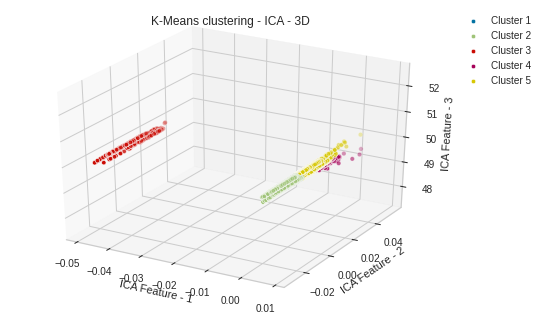

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing the clusters
axes = plt.axes(projection='3d')
sn.scatterplot(ica_selectedfeatures_3_df[y_kmeans_ica_3 == 0, 0], ica_selectedfeatures_3_df[y_kmeans_ica_3 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(ica_selectedfeatures_3_df[y_kmeans_ica_3 == 1, 0], ica_selectedfeatures_3_df[y_kmeans_ica_3 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(ica_selectedfeatures_3_df[y_kmeans_ica_3 == 2, 0], ica_selectedfeatures_3_df[y_kmeans_ica_3 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(ica_selectedfeatures_3_df[y_kmeans_ica_3 == 3, 0], ica_selectedfeatures_3_df[y_kmeans_ica_3 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(ica_selectedfeatures_3_df[y_kmeans_ica_3 == 4, 0], ica_selectedfeatures_3_df[y_kmeans_ica_3 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
axes.set_xlabel('ICA Feature - 1')
axes.set_ylabel('ICA Feature - 2')
axes.set_zlabel('ICA Feature - 3')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('K-Means clustering - ICA - 3D')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':
/usr/local/lib/pyt

Text(0.5, 0.92, 'K-Means clustering - RP - 3D')

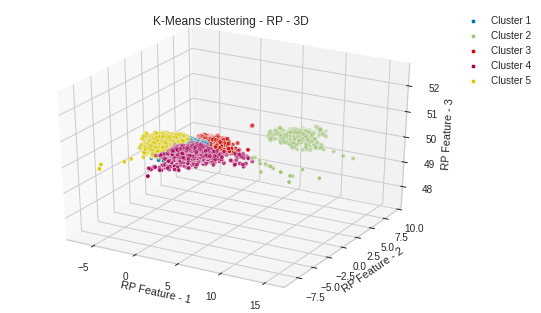

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing the clusters
axes = plt.axes(projection='3d')
sn.scatterplot(rp_selectedfeatures_3_df[y_kmeans_rp_3 == 0, 0], rp_selectedfeatures_3_df[y_kmeans_rp_3 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(rp_selectedfeatures_3_df[y_kmeans_rp_3 == 1, 0], rp_selectedfeatures_3_df[y_kmeans_rp_3 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(rp_selectedfeatures_3_df[y_kmeans_rp_3 == 2, 0], rp_selectedfeatures_3_df[y_kmeans_rp_3 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(rp_selectedfeatures_3_df[y_kmeans_rp_3 == 3, 0], rp_selectedfeatures_3_df[y_kmeans_rp_3 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(rp_selectedfeatures_3_df[y_kmeans_rp_3 == 4, 0], rp_selectedfeatures_3_df[y_kmeans_rp_3 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
axes.set_xlabel('RP Feature - 1')
axes.set_ylabel('RP Feature - 2')
axes.set_zlabel('RP Feature - 3')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('K-Means clustering - RP - 3D')

In [ ]:
from sklearn.mixture import GaussianMixture
em_forward_selection = GaussianMixture(n_components = 5,random_state = 1234, n_init = 10)
y_em_forward_selection = em_forward_selection.fit_predict(x[:, feat_cols])

em_pca_2 = GaussianMixture(n_components = 5,random_state = 1234, n_init = 10)
y_em_pca_2 = em_pca_2.fit_predict(pca_selectedfeatures_2_df)

em_ica_2 = GaussianMixture(n_components = 5,random_state = 1234, n_init = 10)
y_em_ica_2 = em_ica_2.fit_predict(ica_selectedfeatures_2_df)

em_rp_2 = GaussianMixture(n_components = 5,random_state = 1234, n_init = 10)
y_em_rp_2 = em_rp_2.fit_predict(rp_selectedfeatures_2_df)

em_pca_3 = GaussianMixture(n_components = 5,random_state = 1234, n_init = 10)
y_em_pca_3 = em_pca_3.fit_predict(pca_selectedfeatures_3_df)

em_ica_3 = GaussianMixture(n_components = 5,random_state = 1234, n_init = 10)
y_em_ica_3 = em_ica_3.fit_predict(ica_selectedfeatures_3_df)

em_rp_3 = GaussianMixture(n_components = 5,random_state = 1234, n_init = 10)
y_em_rp_3 = em_rp_3.fit_predict(rp_selectedfeatures_3_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

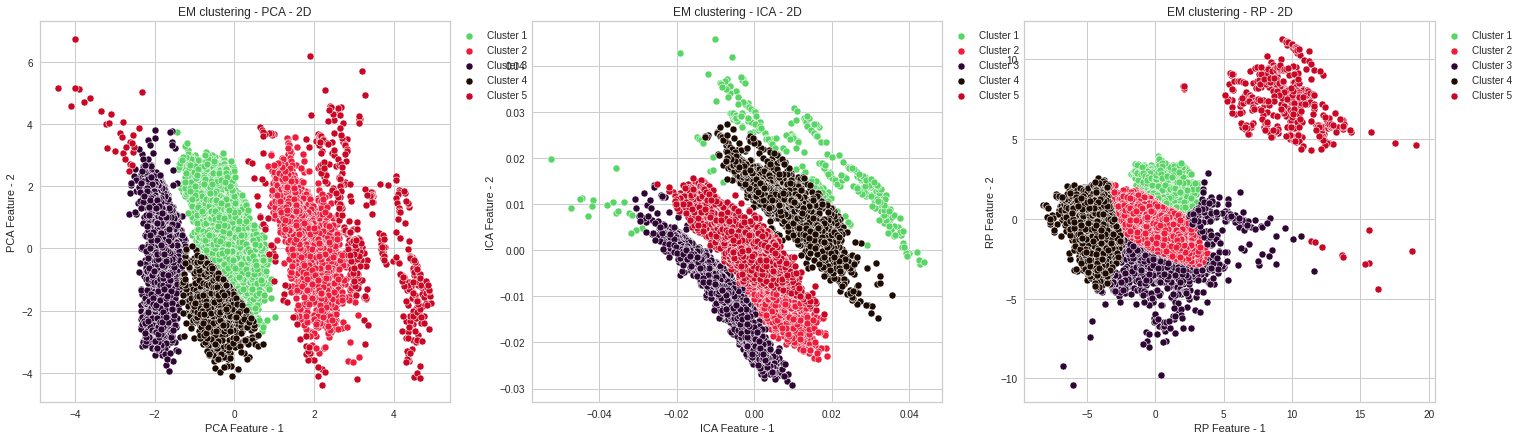

In [ ]:
# size of image
fig = plt.figure(figsize = (25, 7))
plt.subplot(1, 3, 1)

# visualizing the clusters
sn.scatterplot(pca_selectedfeatures_2_df[y_em_pca_2 == 0, 0], pca_selectedfeatures_2_df[y_em_pca_2 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(pca_selectedfeatures_2_df[y_em_pca_2 == 1, 0], pca_selectedfeatures_2_df[y_em_pca_2 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(pca_selectedfeatures_2_df[y_em_pca_2 == 2, 0], pca_selectedfeatures_2_df[y_em_pca_2 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(pca_selectedfeatures_2_df[y_em_pca_2 == 3, 0], pca_selectedfeatures_2_df[y_em_pca_2 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(pca_selectedfeatures_2_df[y_em_pca_2 == 4, 0], pca_selectedfeatures_2_df[y_em_pca_2 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
plt.xlabel('PCA Feature - 1')
plt.ylabel('PCA Feature - 2')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('EM clustering - PCA - 2D')

plt.subplot(1, 3, 2)

# visualizing the clusters
sn.scatterplot(ica_selectedfeatures_2_df[y_em_ica_2 == 0, 0], ica_selectedfeatures_2_df[y_em_ica_2 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(ica_selectedfeatures_2_df[y_em_ica_2 == 1, 0], ica_selectedfeatures_2_df[y_em_ica_2 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(ica_selectedfeatures_2_df[y_em_ica_2 == 2, 0], ica_selectedfeatures_2_df[y_em_ica_2 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(ica_selectedfeatures_2_df[y_em_ica_2 == 3, 0], ica_selectedfeatures_2_df[y_em_ica_2 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(ica_selectedfeatures_2_df[y_em_ica_2 == 4, 0], ica_selectedfeatures_2_df[y_em_ica_2 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
plt.xlabel('ICA Feature - 1')
plt.ylabel('ICA Feature - 2')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('EM clustering - ICA - 2D')


plt.subplot(1, 3, 3)

# visualizing the clusters
sn.scatterplot(rp_selectedfeatures_2_df[y_em_rp_2 == 0, 0], rp_selectedfeatures_2_df[y_em_rp_2 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(rp_selectedfeatures_2_df[y_em_rp_2 == 1, 0], rp_selectedfeatures_2_df[y_em_rp_2 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(rp_selectedfeatures_2_df[y_em_rp_2 == 2, 0], rp_selectedfeatures_2_df[y_em_rp_2 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(rp_selectedfeatures_2_df[y_em_rp_2 == 3, 0], rp_selectedfeatures_2_df[y_em_rp_2 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(rp_selectedfeatures_2_df[y_em_rp_2 == 4, 0], rp_selectedfeatures_2_df[y_em_rp_2 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
plt.xlabel('RP Feature - 1')
plt.ylabel('RP Feature - 2')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('EM clustering - RP - 2D')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':
/usr/local/lib/pyt

Text(0.5, 0.92, 'EM clustering - PCA - 3D')

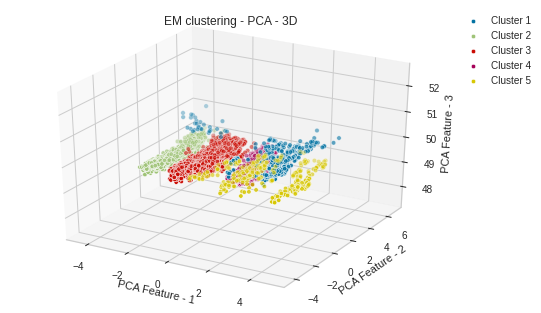

In [ ]:
# visualizing the clusters
axes = plt.axes(projection='3d')
sn.scatterplot(pca_selectedfeatures_3_df[y_em_pca_3 == 0, 0], pca_selectedfeatures_3_df[y_em_pca_3 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(pca_selectedfeatures_3_df[y_em_pca_3 == 1, 0], pca_selectedfeatures_3_df[y_em_pca_3 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(pca_selectedfeatures_3_df[y_em_pca_3 == 2, 0], pca_selectedfeatures_3_df[y_em_pca_3 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(pca_selectedfeatures_3_df[y_em_pca_3 == 3, 0], pca_selectedfeatures_3_df[y_em_pca_3 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(pca_selectedfeatures_3_df[y_em_pca_3 == 4, 0], pca_selectedfeatures_3_df[y_em_pca_3 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
axes.set_xlabel('PCA Feature - 1')
axes.set_ylabel('PCA Feature - 2')
axes.set_zlabel('PCA Feature - 3')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('EM clustering - PCA - 3D')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':
/usr/local/lib/pyt

Text(0.5, 0.92, 'EM clustering - ICA - 3D')

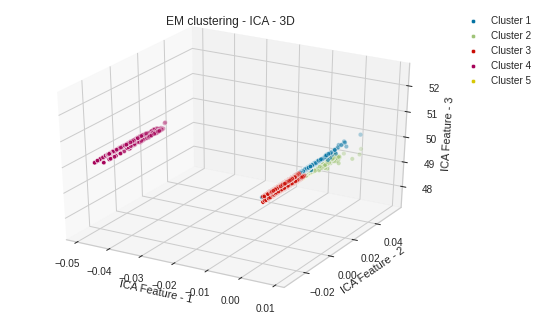

In [ ]:
# visualizing the clusters
axes = plt.axes(projection='3d')
sn.scatterplot(ica_selectedfeatures_3_df[y_em_ica_3 == 0, 0], ica_selectedfeatures_3_df[y_em_ica_3 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(ica_selectedfeatures_3_df[y_em_ica_3 == 1, 0], ica_selectedfeatures_3_df[y_em_ica_3 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(ica_selectedfeatures_3_df[y_em_ica_3 == 2, 0], ica_selectedfeatures_3_df[y_em_ica_3 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(ica_selectedfeatures_3_df[y_em_ica_3 == 3, 0], ica_selectedfeatures_3_df[y_em_ica_3 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(ica_selectedfeatures_3_df[y_em_ica_3 == 4, 0], ica_selectedfeatures_3_df[y_em_ica_3 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)


# labeling
axes.set_xlabel('ICA Feature - 1')
axes.set_ylabel('ICA Feature - 2')
axes.set_zlabel('ICA Feature - 3')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('EM clustering - ICA - 3D')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':
/usr/local/lib/pyt

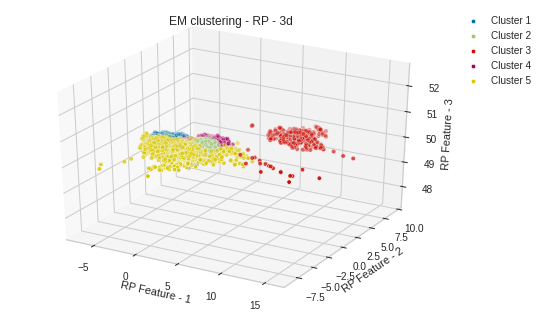

In [ ]:
# visualizing the clusters
axes = plt.axes(projection='3d')
sn.scatterplot(rp_selectedfeatures_3_df[y_em_rp_3 == 0, 0], rp_selectedfeatures_3_df[y_em_rp_3 == 0, 1], color = colors[0], label = 'Cluster 1',s=50)
sn.scatterplot(rp_selectedfeatures_3_df[y_em_rp_3 == 1, 0], rp_selectedfeatures_3_df[y_em_rp_3 == 1, 1], color = colors[1], label = 'Cluster 2',s=50)
sn.scatterplot(rp_selectedfeatures_3_df[y_em_rp_3 == 2, 0], rp_selectedfeatures_3_df[y_em_rp_3 == 2, 1], color = colors[2], label = 'Cluster 3',s=50)
sn.scatterplot(rp_selectedfeatures_3_df[y_em_rp_3 == 3, 0], rp_selectedfeatures_3_df[y_em_rp_3 == 3, 1], color = colors[3], label = 'Cluster 4',s=50)
sn.scatterplot(rp_selectedfeatures_3_df[y_em_rp_3 == 4, 0], rp_selectedfeatures_3_df[y_em_rp_3 == 4, 1], color = colors[4], label = 'Cluster 5',s=50)

# labeling
axes.set_xlabel('RP Feature - 1')
axes.set_ylabel('RP Feature - 2')
axes.set_zlabel('RP Feature - 3')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.title('EM clustering - RP - 3d')

plt.show()

In [ ]:
import time
import tensorflow as tf
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()

from keras import metrics
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
#Neural Network
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 9,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam = ann.fit(x_train[:, feat_cols], y_train, 
                           validation_data = (x_test[:, feat_cols],y_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.5820 - accuracy: 0.7124 - f1_metric: 0.5308 - auc: 0.8602 - val_loss: 0.4889 - val_accuracy: 0.8542 - val_f1_metric: 0.8369 - val_auc: 0.9363
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4645 - accuracy: 0.8728 - f1_metric: 0.8615 - auc: 0.9322 - val_loss: 0.4462 - val_accuracy: 0.8842 - val_f1_metric: 0.8785 - val_auc: 0.9354
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4315 - accuracy: 0.8783 - f1_metric: 0.8687 - auc: 0.9385 - val_loss: 0.4198 - val_accuracy: 0.8877 - val_f1_metric: 0.8846 - val_auc: 0.9389
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4038 - accuracy: 0.8835 - f1_metric: 0.8724 - auc: 0.9430 - val_loss: 0.3963 - val_accuracy: 0.8936 - val_f1_metric: 0.8897 - val_auc: 0.9411
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3819 - accuracy: 0.8901 - f1_metric: 0.8830 - a

[[1170   98]
 [ 108 1162]]


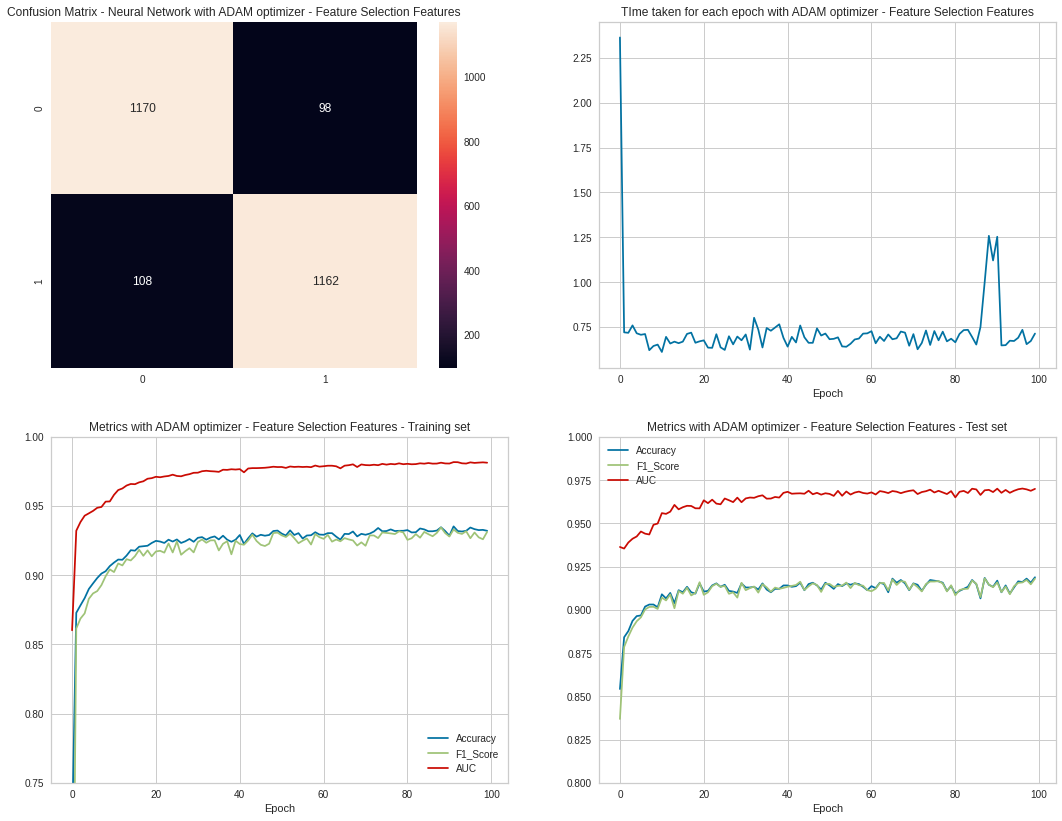

In [ ]:
y_pred_adam = ann.predict(x_test[:, feat_cols])
y_pred_adam = (y_pred_adam > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_adam = confusion_matrix(y_test, y_pred_adam)
print(cm_adam)

fig = plt.figure(figsize = (18, 14))

plt.subplot(2, 2, 1)
ax1 = sn.heatmap(cm_adam, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Neural Network with ADAM optimizer - Feature Selection Features')

plt.subplot(2, 2, 2)
plt.plot(time_callback.times)
plt.title('TIme taken for each epoch with ADAM optimizer - Feature Selection Features')
plt.xlabel('Time')
plt.xlabel('Epoch')

plt.subplot(2, 2, 3)
plt.plot(history_ann_adam.history['accuracy'])
plt.plot(history_ann_adam.history['f1_metric'])
plt.plot(history_ann_adam.history['auc'])
plt.title('Metrics with ADAM optimizer - Feature Selection Features - Training set')
plt.xlabel('Epoch')
plt.ylim(0.75,1)
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(2, 2, 4)
plt.plot(history_ann_adam.history['val_accuracy'])
plt.plot(history_ann_adam.history['val_f1_metric'])
plt.plot(history_ann_adam.history['val_auc'])
plt.title('Metrics with ADAM optimizer - Feature Selection Features - Test set')
plt.xlabel('Epoch')
plt.ylim(0.80,1)
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()

In [ ]:
x_train_1, x_test_1, y_train, y_test = train_test_split(pca_selectedfeatures_2_df, y, test_size = 0.3, random_state = 1234)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 2,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam_1 = ann.fit(x_train_1, y_train, 
                           validation_data = (x_test_1,y_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.5132 - accuracy: 0.8045 - f1_metric: 0.7718 - auc_1: 0.8664 - val_loss: 0.3592 - val_accuracy: 0.8479 - val_f1_metric: 0.8368 - val_auc_1: 0.9211
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3721 - accuracy: 0.8354 - f1_metric: 0.8303 - auc_1: 0.9146 - val_loss: 0.3563 - val_accuracy: 0.8495 - val_f1_metric: 0.8395 - val_auc_1: 0.9221
Epoch 3/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3700 - accuracy: 0.8330 - f1_metric: 0.8310 - auc_1: 0.9154 - val_loss: 0.3551 - val_accuracy: 0.8463 - val_f1_metric: 0.8382 - val_auc_1: 0.9223
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3687 - accuracy: 0.8357 - f1_metric: 0.8329 - auc_1: 0.9162 - val_loss: 0.3578 - val_accuracy: 0.8440 - val_f1_metric: 0.8352 - val_auc_1: 0.9223
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3688 - accuracy: 0.8328 - f1_me

[[1099  197]
 [ 199 1043]]


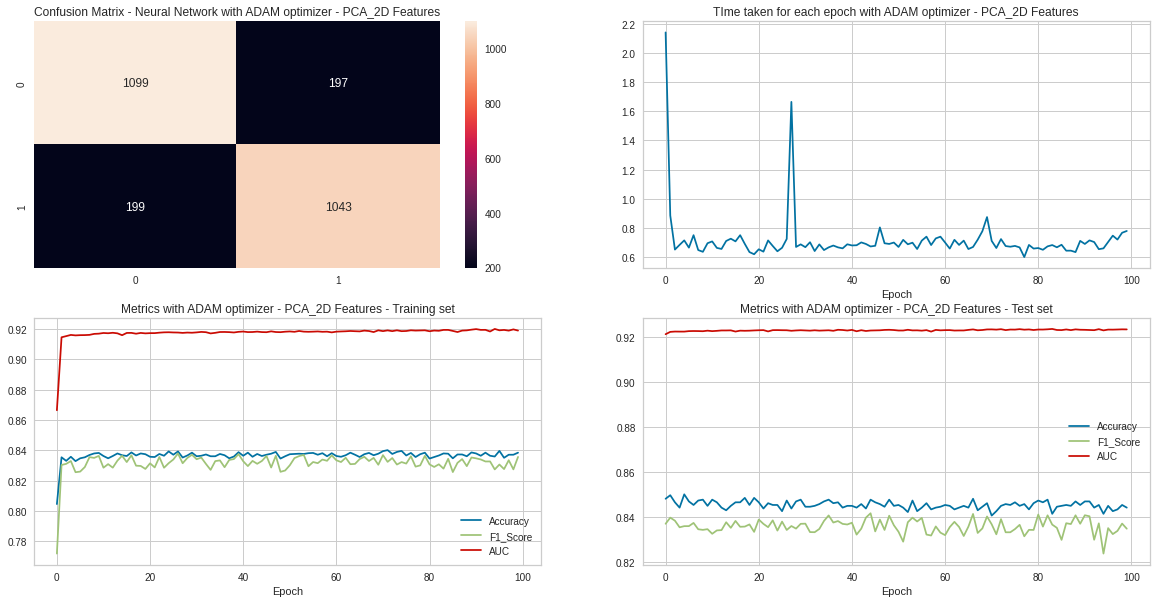

In [ ]:
y_pred_adam_1 = ann.predict(x_test_1)
y_pred_adam_1 = (y_pred_adam_1 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_adam_1 = confusion_matrix(y_test, y_pred_adam_1)

cm_adam_1 = confusion_matrix(y_test, y_pred_adam_1)
print(cm_adam_1)
accuracy_score(y_test, y_pred_adam_1)

fig = plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
ax1 = sn.heatmap(cm_adam_1, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Neural Network with ADAM optimizer - PCA_2D Features')

plt.subplot(2, 2, 2)
plt.plot(time_callback.times)
plt.title('TIme taken for each epoch with ADAM optimizer - PCA_2D Features')
plt.xlabel('Time')
plt.xlabel('Epoch')

plt.subplot(2, 2, 3)
plt.plot(history_ann_adam_1.history['accuracy'])
plt.plot(history_ann_adam_1.history['f1_metric'])
plt.plot(history_ann_adam_1.history['auc_1'])
plt.title('Metrics with ADAM optimizer - PCA_2D Features - Training set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(2, 2, 4)
plt.plot(history_ann_adam_1.history['val_accuracy'])
plt.plot(history_ann_adam_1.history['val_f1_metric'])
plt.plot(history_ann_adam_1.history['val_auc_1'])
plt.title('Metrics with ADAM optimizer - PCA_2D Features - Test set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()

In [ ]:
x_train_2, x_test_2, y_train, y_test = train_test_split(ica_selectedfeatures_2_df, y, test_size = 0.3, random_state = 1234)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 2,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam_2 = ann.fit(x_train_2, y_train, 
                           validation_data = (x_test_2,y_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.6639 - accuracy: 0.5687 - f1_metric: 0.6944 - auc_2: 0.7379 - val_loss: 0.5948 - val_accuracy: 0.7967 - val_f1_metric: 0.8093 - val_auc_2: 0.8997
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.5429 - accuracy: 0.7882 - f1_metric: 0.8025 - auc_2: 0.8703 - val_loss: 0.5372 - val_accuracy: 0.7971 - val_f1_metric: 0.7455 - val_auc_2: 0.8279
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4992 - accuracy: 0.8141 - f1_metric: 0.8109 - auc_2: 0.8711 - val_loss: 0.4730 - val_accuracy: 0.8385 - val_f1_metric: 0.8277 - val_auc_2: 0.8861
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4773 - accuracy: 0.8186 - f1_metric: 0.8122 - auc_2: 0.8679 - val_loss: 0.4639 - val_accuracy: 0.8255 - val_f1_metric: 0.7985 - val_auc_2: 0.8747
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4660 - accuracy: 0.8200 - f1_me

[[1077  219]
 [ 182 1060]]


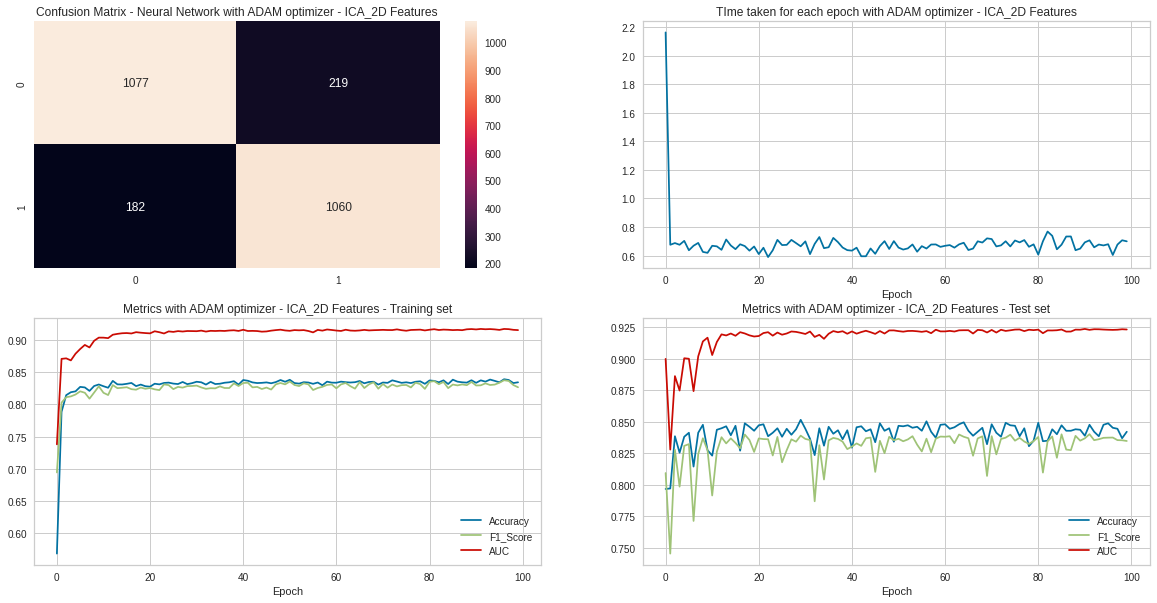

In [ ]:
y_pred_adam_2 = ann.predict(x_test_2)
y_pred_adam_2 = (y_pred_adam_2 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_adam_2 = confusion_matrix(y_test, y_pred_adam_2)

cm_adam_2 = confusion_matrix(y_test, y_pred_adam_2)
print(cm_adam_2)
accuracy_score(y_test, y_pred_adam_2)

fig = plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
ax1 = sn.heatmap(cm_adam_2, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Neural Network with ADAM optimizer - ICA_2D Features')

plt.subplot(2, 2, 2)
plt.plot(time_callback.times)
plt.title('TIme taken for each epoch with ADAM optimizer - ICA_2D Features')
plt.xlabel('Time')
plt.xlabel('Epoch')

plt.subplot(2, 2, 3)
plt.plot(history_ann_adam_2.history['accuracy'])
plt.plot(history_ann_adam_2.history['f1_metric'])
plt.plot(history_ann_adam_2.history['auc_2'])
plt.title('Metrics with ADAM optimizer - ICA_2D Features - Training set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(2, 2, 4)
plt.plot(history_ann_adam_2.history['val_accuracy'])
plt.plot(history_ann_adam_2.history['val_f1_metric'])
plt.plot(history_ann_adam_2.history['val_auc_2'])
plt.title('Metrics with ADAM optimizer - ICA_2D Features - Test set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()

In [ ]:
x_train_3, x_test_3, y_train, y_test = train_test_split(rp_selectedfeatures_2_df, y, test_size = 0.3, random_state = 1234)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 2,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam_3 = ann.fit(x_train_3, y_train, 
                           validation_data = (x_test_3,y_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 3s 7ms/step - loss: 0.6571 - accuracy: 0.6084 - f1_metric: 0.4765 - auc_3: 0.6722 - val_loss: 0.6282 - val_accuracy: 0.6533 - val_f1_metric: 0.6722 - val_auc_3: 0.7070
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.6220 - accuracy: 0.6537 - f1_metric: 0.6762 - auc_3: 0.7039 - val_loss: 0.6077 - val_accuracy: 0.6734 - val_f1_metric: 0.6902 - val_auc_3: 0.7225
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.6145 - accuracy: 0.6608 - f1_metric: 0.6852 - auc_3: 0.7121 - val_loss: 0.6041 - val_accuracy: 0.6726 - val_f1_metric: 0.6909 - val_auc_3: 0.7231
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.6105 - accuracy: 0.6614 - f1_metric: 0.6762 - auc_3: 0.7137 - val_loss: 0.6019 - val_accuracy: 0.6714 - val_f1_metric: 0.6841 - val_auc_3: 0.7279
Epoch 5/100
186/186 [==============================] - 1s 3ms/step - loss: 0.6080 - accuracy: 0.6609 - f1_me

[[1020  276]
 [ 457  785]]


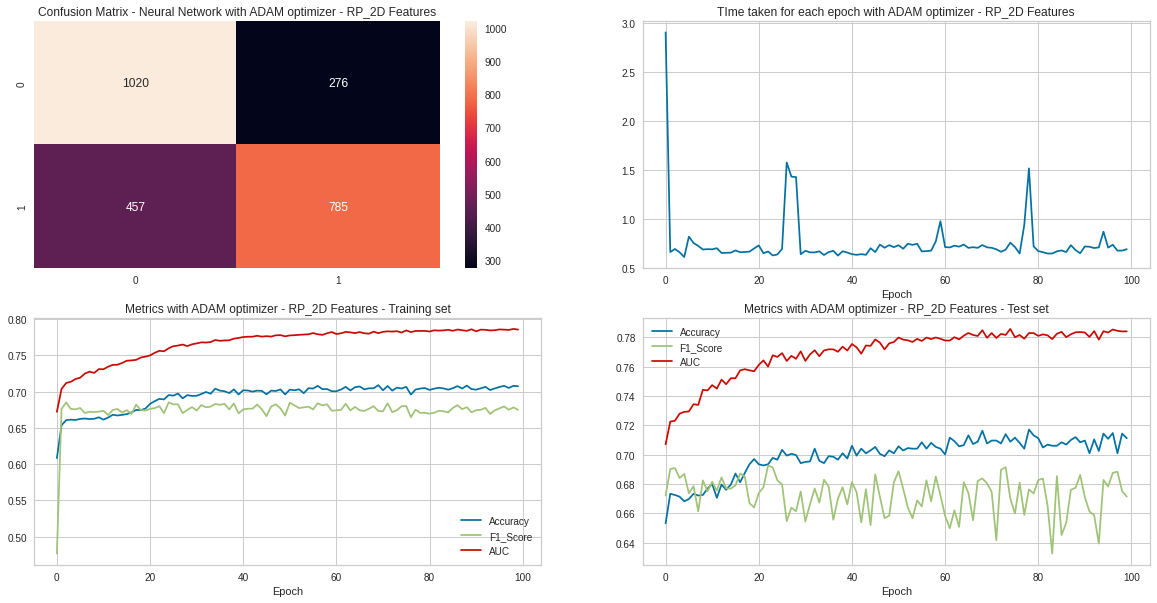

In [ ]:
y_pred_adam_3 = ann.predict(x_test_3)
y_pred_adam_3 = (y_pred_adam_3 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_adam_3 = confusion_matrix(y_test, y_pred_adam_3)

cm_adam_3 = confusion_matrix(y_test, y_pred_adam_3)
print(cm_adam_3)
accuracy_score(y_test, y_pred_adam_3)

fig = plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
ax1 = sn.heatmap(cm_adam_3, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Neural Network with ADAM optimizer - RP_2D Features')

plt.subplot(2, 2, 2)
plt.plot(time_callback.times)
plt.title('TIme taken for each epoch with ADAM optimizer - RP_2D Features')
plt.xlabel('Time')
plt.xlabel('Epoch')

plt.subplot(2, 2, 3)
plt.plot(history_ann_adam_3.history['accuracy'])
plt.plot(history_ann_adam_3.history['f1_metric'])
plt.plot(history_ann_adam_3.history['auc_3'])
plt.title('Metrics with ADAM optimizer - RP_2D Features - Training set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(2, 2, 4)
plt.plot(history_ann_adam_3.history['val_accuracy'])
plt.plot(history_ann_adam_3.history['val_f1_metric'])
plt.plot(history_ann_adam_3.history['val_auc_3'])
plt.title('Metrics with ADAM optimizer - RP_2D Features - Test set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()

In [ ]:
x_train_4, x_test_4, y_train, y_test = train_test_split(pca_selectedfeatures_3_df, y, test_size = 0.3, random_state = 1123401)
x_train_5, x_test_5, y_train, y_test = train_test_split(ica_selectedfeatures_3_df, y, test_size = 0.3, random_state = 1123401)
x_train_6, x_test_6, y_train, y_test = train_test_split(rp_selectedfeatures_3_df, y, test_size = 0.3, random_state = 1123401)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 3,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam_4 = ann.fit(x_train_4, y_train, 
                           validation_data = (x_test_4,y_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 3s 11ms/step - loss: 0.4876 - accuracy: 0.8163 - f1_metric: 0.7928 - auc_4: 0.8828 - val_loss: 0.3561 - val_accuracy: 0.8400 - val_f1_metric: 0.8242 - val_auc_4: 0.9243
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3557 - accuracy: 0.8419 - f1_metric: 0.8293 - auc_4: 0.9226 - val_loss: 0.3510 - val_accuracy: 0.8519 - val_f1_metric: 0.8491 - val_auc_4: 0.9251
Epoch 3/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3510 - accuracy: 0.8433 - f1_metric: 0.8350 - auc_4: 0.9246 - val_loss: 0.3446 - val_accuracy: 0.8499 - val_f1_metric: 0.8419 - val_auc_4: 0.9275
Epoch 4/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3487 - accuracy: 0.8458 - f1_metric: 0.8419 - auc_4: 0.9253 - val_loss: 0.3452 - val_accuracy: 0.8522 - val_f1_metric: 0.8458 - val_auc_4: 0.9283
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3458 - accuracy: 0.8465 - f1_m

[[1128  140]
 [ 228 1042]]


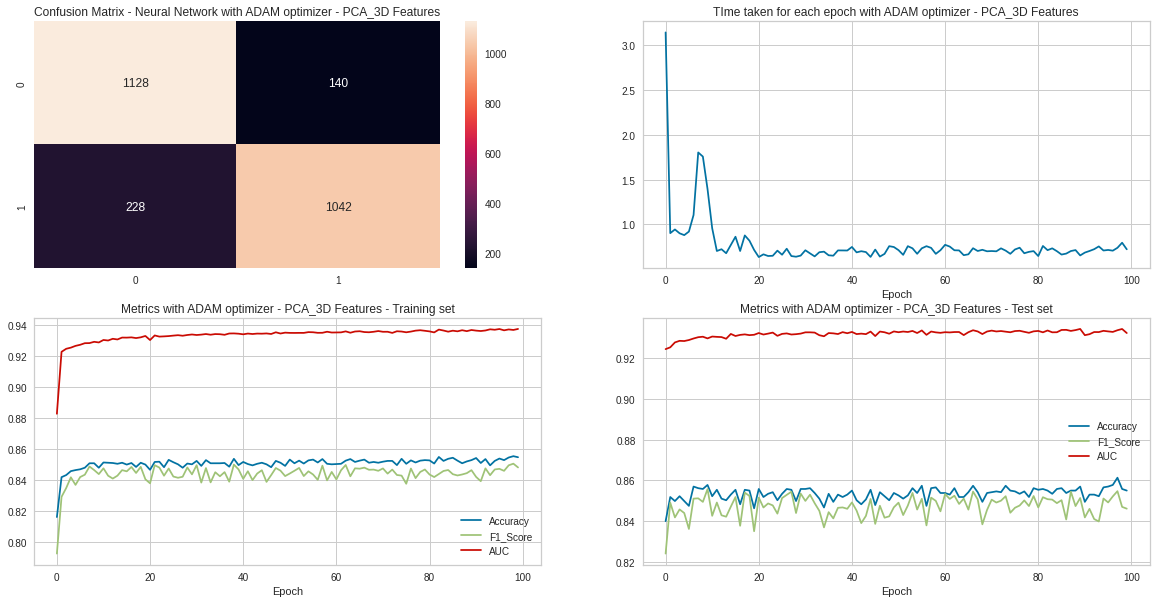

In [ ]:
y_pred_adam_4 = ann.predict(x_test_4)
y_pred_adam_4 = (y_pred_adam_4 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score


cm_adam_4 = confusion_matrix(y_test, y_pred_adam_4)
print(cm_adam_4)
accuracy_score(y_test, y_pred_adam_4)

fig = plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
ax1 = sn.heatmap(cm_adam_4, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Neural Network with ADAM optimizer - PCA_3D Features')


plt.subplot(2, 2, 2)
plt.plot(time_callback.times)
plt.title('TIme taken for each epoch with ADAM optimizer - PCA_3D Features')
plt.xlabel('Time')
plt.xlabel('Epoch')

plt.subplot(2, 2, 3)
plt.plot(history_ann_adam_4.history['accuracy'])
plt.plot(history_ann_adam_4.history['f1_metric'])
plt.plot(history_ann_adam_4.history['auc_4'])
plt.title('Metrics with ADAM optimizer - PCA_3D Features - Training set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(2, 2, 4)
plt.plot(history_ann_adam_4.history['val_accuracy'])
plt.plot(history_ann_adam_4.history['val_f1_metric'])
plt.plot(history_ann_adam_4.history['val_auc_4'])
plt.title('Metrics with ADAM optimizer - PCA_3D Features - Test set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 3,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam_5 = ann.fit(x_train_5, y_train, 
                           validation_data = (x_test_5,y_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.6723 - accuracy: 0.6165 - f1_metric: 0.7148 - auc_5: 0.7817 - val_loss: 0.6067 - val_accuracy: 0.7805 - val_f1_metric: 0.8082 - val_auc_5: 0.9008
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4764 - accuracy: 0.8139 - f1_metric: 0.8105 - auc_5: 0.8815 - val_loss: 0.3983 - val_accuracy: 0.8286 - val_f1_metric: 0.8248 - val_auc_5: 0.9046
Epoch 3/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3977 - accuracy: 0.8212 - f1_metric: 0.8175 - auc_5: 0.9022 - val_loss: 0.3836 - val_accuracy: 0.8322 - val_f1_metric: 0.8215 - val_auc_5: 0.9090
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8286 - f1_metric: 0.8190 - auc_5: 0.9071 - val_loss: 0.4120 - val_accuracy: 0.7998 - val_f1_metric: 0.7652 - val_auc_5: 0.9131
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3813 - accuracy: 0.8305 - f1_me

[[1128  140]
 [ 273  997]]


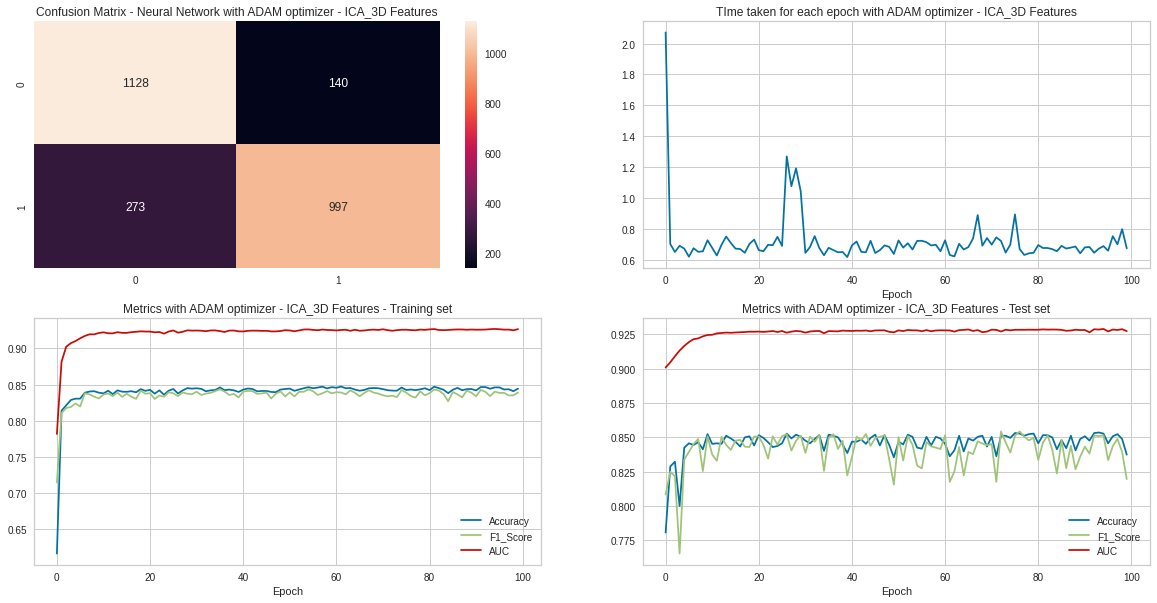

In [ ]:
y_pred_adam_5 = ann.predict(x_test_5)
y_pred_adam_5 = (y_pred_adam_5 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_adam_5 = confusion_matrix(y_test, y_pred_adam_5)
print(cm_adam_5)
accuracy_score(y_test, y_pred_adam_5)

fig = plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
ax1 = sn.heatmap(cm_adam_5, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Neural Network with ADAM optimizer - ICA_3D Features')


plt.subplot(2, 2, 2)
plt.plot(time_callback.times)
plt.title('TIme taken for each epoch with ADAM optimizer - ICA_3D Features')
plt.xlabel('Time')
plt.xlabel('Epoch')

plt.subplot(2, 2, 3)
plt.plot(history_ann_adam_5.history['accuracy'])
plt.plot(history_ann_adam_5.history['f1_metric'])
plt.plot(history_ann_adam_5.history['auc_5'])
plt.title('Metrics with ADAM optimizer - ICA_3D Features - Training set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(2, 2, 4)
plt.plot(history_ann_adam_5.history['val_accuracy'])
plt.plot(history_ann_adam_5.history['val_f1_metric'])
plt.plot(history_ann_adam_5.history['val_auc_5'])
plt.title('Metrics with ADAM optimizer - ICA_3D Features - Test set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 3,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam_6 = ann.fit(x_train_6, y_train, 
                           validation_data = (x_test_6,y_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.6424 - accuracy: 0.6359 - f1_metric: 0.4830 - auc_6: 0.7432 - val_loss: 0.6271 - val_accuracy: 0.6939 - val_f1_metric: 0.6636 - val_auc_6: 0.7659
Epoch 2/100
186/186 [==============================] - 1s 3ms/step - loss: 0.6043 - accuracy: 0.7204 - f1_metric: 0.6873 - auc_6: 0.7872 - val_loss: 0.6011 - val_accuracy: 0.7124 - val_f1_metric: 0.6814 - val_auc_6: 0.7855
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.5801 - accuracy: 0.7281 - f1_metric: 0.7153 - auc_6: 0.7964 - val_loss: 0.5692 - val_accuracy: 0.7368 - val_f1_metric: 0.7244 - val_auc_6: 0.8040
Epoch 4/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5313 - accuracy: 0.7496 - f1_metric: 0.7449 - auc_6: 0.8178 - val_loss: 0.5188 - val_accuracy: 0.7522 - val_f1_metric: 0.7483 - val_auc_6: 0.8263
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4975 - accuracy: 0.7705 - f1_me

[[1093  175]
 [ 295  975]]


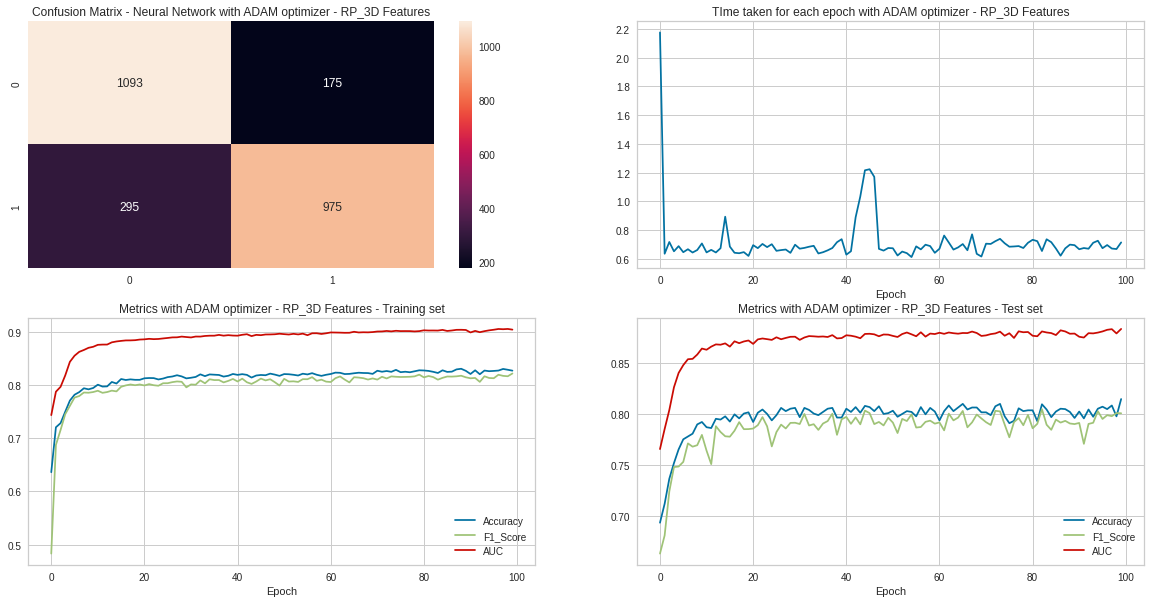

In [ ]:
y_pred_adam_6 = ann.predict(x_test_6)
y_pred_adam_6 = (y_pred_adam_6 > 0.5)

cm_adam_6 = confusion_matrix(y_test, y_pred_adam_6)
print(cm_adam_6)
accuracy_score(y_test, y_pred_adam_6)

fig = plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
ax1 = sn.heatmap(cm_adam_6, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Neural Network with ADAM optimizer - RP_3D Features')

plt.subplot(2, 2, 2)
plt.plot(time_callback.times)
plt.title('TIme taken for each epoch with ADAM optimizer - RP_3D Features')
plt.xlabel('Time')
plt.xlabel('Epoch')

plt.subplot(2, 2, 3)
plt.plot(history_ann_adam_6.history['accuracy'])
plt.plot(history_ann_adam_6.history['f1_metric'])
plt.plot(history_ann_adam_6.history['auc_6'])
plt.title('Metrics with ADAM optimizer - RP_3D Features - Training set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(2, 2, 4)
plt.plot(history_ann_adam_6.history['val_accuracy'])
plt.plot(history_ann_adam_6.history['val_f1_metric'])
plt.plot(history_ann_adam_6.history['val_auc_6'])
plt.title('Metrics with ADAM optimizer - RP_3D Features - Test set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()

In [ ]:
kmeans_allfeatures_labels = pd.DataFrame(kmeans_allfeatures.labels_)
one_hot_encoder_kmeans = OneHotEncoder(handle_unknown = "ignore")
kmeans_allfeatures_labels_encoded = pd.DataFrame(one_hot_encoder_kmeans.fit_transform(kmeans_allfeatures_labels).toarray())
x_train_7, x_test_7, y_train, y_test = train_test_split(kmeans_allfeatures_labels_encoded, y, test_size = 0.3, random_state = 1123401)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 5,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam_7 = ann.fit(x_train_7, y_train, 
                           validation_data = (x_test_7,y_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.5995 - accuracy: 0.6895 - f1_metric: 0.6818 - auc_10: 0.7332 - val_loss: 0.5301 - val_accuracy: 0.7297 - val_f1_metric: 0.7702 - val_auc_10: 0.7710
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.5247 - accuracy: 0.7271 - f1_metric: 0.7671 - auc_10: 0.7757 - val_loss: 0.5264 - val_accuracy: 0.7297 - val_f1_metric: 0.7702 - val_auc_10: 0.7799
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.5236 - accuracy: 0.7246 - f1_metric: 0.7665 - auc_10: 0.7764 - val_loss: 0.5260 - val_accuracy: 0.7297 - val_f1_metric: 0.7702 - val_auc_10: 0.7799
Epoch 4/100
186/186 [==============================] - 1s 3ms/step - loss: 0.5228 - accuracy: 0.7246 - f1_metric: 0.7593 - auc_10: 0.7797 - val_loss: 0.5254 - val_accuracy: 0.7297 - val_f1_metric: 0.7702 - val_auc_10: 0.7799
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.5228 - accuracy: 0.7256

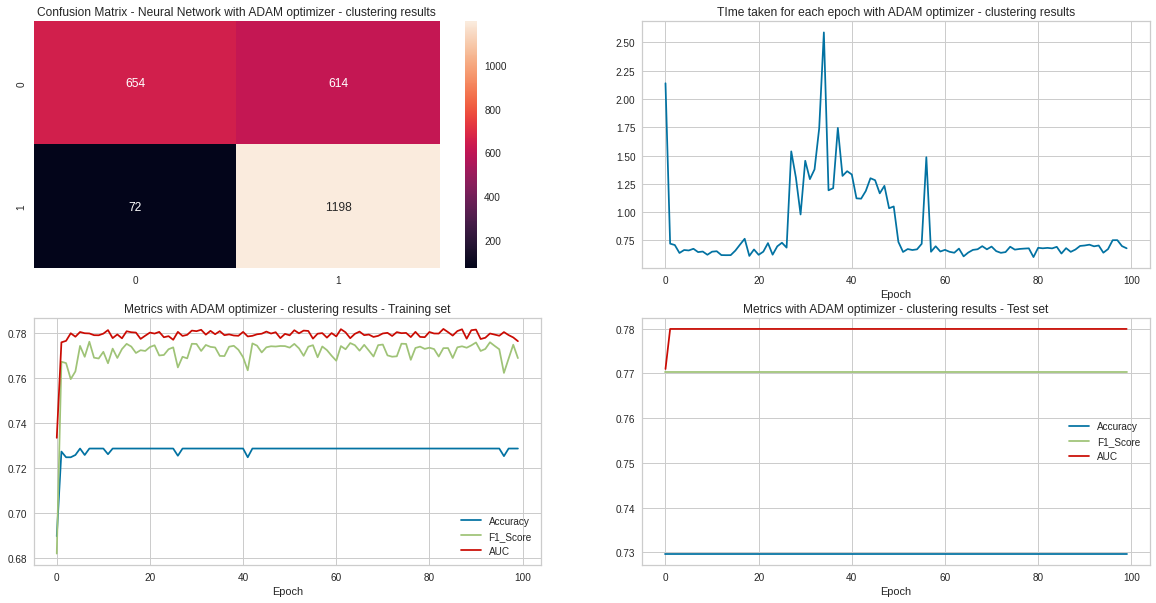

In [ ]:
y_pred_adam_7 = ann.predict(x_test_7)
y_pred_adam_7 = (y_pred_adam_7 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_adam_7 = confusion_matrix(y_test, y_pred_adam_7)

fig = plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
ax1 = sn.heatmap(cm_adam_7, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Neural Network with ADAM optimizer - clustering results')

plt.subplot(2, 2, 2)
plt.plot(time_callback.times)
plt.title('TIme taken for each epoch with ADAM optimizer - clustering results')
plt.xlabel('Time')
plt.xlabel('Epoch')

plt.subplot(2, 2, 3)
plt.plot(history_ann_adam_7.history['accuracy'])
plt.plot(history_ann_adam_7.history['f1_metric'])
plt.plot(history_ann_adam_7.history['auc_7'])
plt.title('Metrics with ADAM optimizer - clustering results - Training set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(2, 2, 4)
plt.plot(history_ann_adam_7.history['val_accuracy'])
plt.plot(history_ann_adam_7.history['val_f1_metric'])
plt.plot(history_ann_adam_7.history['val_auc_7'])
plt.title('Metrics with ADAM optimizer - clustering results - Test set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()

In [ ]:
x = dataset_SeoulBikedata_encoded.drop(columns = ['Rented Bike Count', 'Rented Bike Count_binary'])
y_labels = kmeans_allfeatures.labels_

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(kmeans_allfeatures.labels_)
encoded_y = encoder.transform(kmeans_allfeatures.labels_)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)


x_train_8, x_test_8, y_labels_train, y_labels_test = train_test_split(x, dummy_y, test_size = 0.3, random_state = 1123401)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 14, input_dim = 14,  activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 5, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', f1_metric, metrics.AUC()])
history_ann_adam_8 = ann.fit(x_train_8, y_labels_train, 
                           validation_data = (x_test_8,y_labels_test), 
                           batch_size = 32, epochs = 100, callbacks = [time_callback])

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 2.1438 - accuracy: 0.3257 - f1_metric: 0.3667 - auc_9: 0.6230 - val_loss: 1.3160 - val_accuracy: 0.4165 - val_f1_metric: 0.3629 - val_auc_9: 0.7381
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 1.2552 - accuracy: 0.4829 - f1_metric: 0.3716 - auc_9: 0.7328 - val_loss: 1.1746 - val_accuracy: 0.4957 - val_f1_metric: 0.3892 - val_auc_9: 0.7766
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 1.1920 - accuracy: 0.5165 - f1_metric: 0.3936 - auc_9: 0.7396 - val_loss: 1.0321 - val_accuracy: 0.6107 - val_f1_metric: 0.3992 - val_auc_9: 0.7754
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 1.0440 - accuracy: 0.5724 - f1_metric: 0.4144 - auc_9: 0.7695 - val_loss: 0.9778 - val_accuracy: 0.5851 - val_f1_metric: 0.4451 - val_auc_9: 0.7878
Epoch 5/100
186/186 [==============================] - 1s 3ms/step - loss: 1.0075 - accuracy: 0.5758 - f1_me

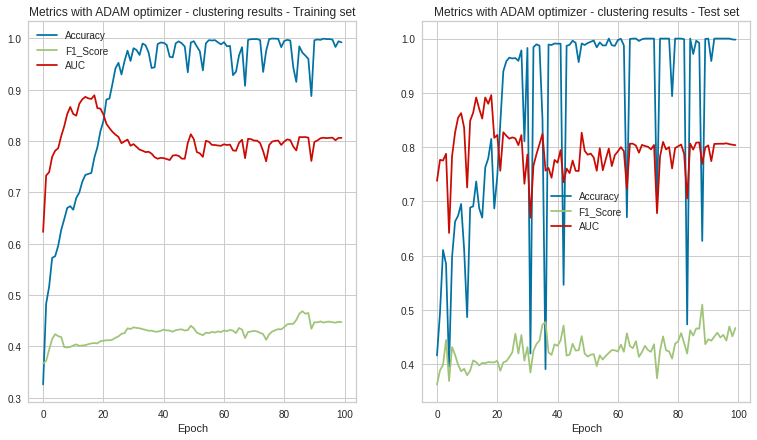

In [ ]:
y_pred_adam_8 = ann.predict(x_test_8)

plt.figure(figsize = (20, 7))
plt.subplot(1, 3, 2)
plt.plot(history_ann_adam_8.history['accuracy'])
plt.plot(history_ann_adam_8.history['f1_metric'])
plt.plot(history_ann_adam_8.history['auc_8'])
plt.title('Metrics with ADAM optimizer - clustering results - Training set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])

plt.subplot(1, 3, 3)
plt.plot(history_ann_adam_8.history['val_accuracy'])
plt.plot(history_ann_adam_8.history['val_f1_metric'])
plt.plot(history_ann_adam_8.history['val_auc_8'])
plt.title('Metrics with ADAM optimizer - clustering results - Test set')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1_Score', 'AUC'])
plt.show()